In [ ]:
# If you find any error on executing this code so kindly first contact me on 8562037731 and 
# discuss the problem because on my side this code is running perfectly

In [286]:
#import libraries
from selenium import webdriver
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import time
import matplotlib.pyplot as plt

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

In [287]:
#initiating webdriver
driver = webdriver.Chrome(executable_path='C:/Users/91856/Downloads/chromedriver/chromedriver.exe')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="a40bac7bf308f567d515896cd5ee59fd")>

In [288]:
# maximizing the screen
driver.maximize_window()

# opening instagram
driver.get('https://www.instagram.com/accounts/login/')

In [308]:
# instagram login
username = driver.find_element_by_name('username')
password = driver.find_element_by_name('password')
username.send_keys('Sample_Username')
password.send_keys('Sample_Password')
login = driver.find_elements_by_xpath('//div[@class="EPjEi"]//div/button')
login[1].submit()

In [290]:
# approving permission of save info and notification (It was asked to me when I logged in...not necessary to run if not asked)
info = driver.find_element_by_xpath('//div[@class="cmbtv"]/button')
if info:
    info.click()
notification = driver.find_elements_by_xpath('//div[@class="mt3GC"]/button')
if notification:
    notification[0].click()

### Q(1.1) Top 5 handles having most number of Followers

In [291]:
search = driver.find_element_by_xpath('//div[starts-with(@class,"LWmhU")]/input')
search.clear()
search.send_keys('food')
time.sleep(3)
l = driver.find_elements_by_xpath('//div[starts-with(@class,"fuqBx")]/div/a')
handles = []
for i in l[:10]:
    handle=i.get_attribute('href')
    if 'explore' not in handle:
        h=handle.split('/')[3]
        handles.append(h.strip())
        
follower = []
for i in handles:
    search = driver.find_element_by_xpath('//div[starts-with(@class,"LWmhU")]/input')
    search.clear()
    search.send_keys(i)
    time.sleep(2)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break;
    time.sleep(2)
    f = driver.find_element_by_xpath('//div[contains(@class,"v9tJq")]//ul//li/a/span')
    n = f.get_attribute('title').replace(',','')
    follower.append(int(n))

    
follower_handle = []
for i in range(len(handles)):
    follower_handle.append([follower[i],handles[i]])
follower_handle.sort()
follower_handle = follower_handle[5:10]
top_handles = []
top_handles_followers = []
for i in follower_handle:
    top_handles.append(i[1])
    top_handles_followers.append(i[0])
for i in range(5):
    print(top_handles[i], top_handles_followers[i])

food 127092
foodtalkindia 305068
foodie_incarnate 480506
dilsefoodie 787610
yourfoodlab 1723248


### Q(1.2) Number of posts these have done in Previous 3 Days

In [292]:
no_post = []
for i in top_handles:
    search = driver.find_element_by_xpath('//div[starts-with(@class,"LWmhU")]/input')
    search.clear()
    search.send_keys(i)
    time.sleep(2)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break;
    time.sleep(2)
    post = driver.find_element_by_xpath('//div[starts-with(@class,"v1Nh3")]')
    post.click()
    l=0
    while True:
        date = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"c-Yi7")]/time')))
        d = date.text.split()
        if len(d)<3 or (d[1] == 'DAYS' and int(d[0])>3):
            break;
        l+=1
        next_post = driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]')
        next_post.click()
    no_post.append(l)
    close = driver.find_element_by_xpath('//div[contains(@class,"yiMZG")]/button')
    close.click()
    
for i in range(5):
    print(top_handles[i], no_post[i])

food 2
foodtalkindia 2
foodie_incarnate 6
dilsefoodie 8
yourfoodlab 4


### Q(1.3) Plotting the graph for above data

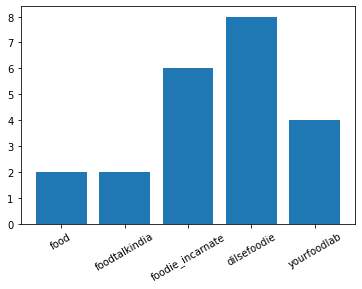

In [294]:
plt.bar(top_handles,no_post)
plt.xticks(rotation=30)
plt.show()

### Q(2.1) Content of First 10 Posts of top 5 handles

In [295]:
content = []
for i in top_handles:
    search = driver.find_element_by_xpath('//div[starts-with(@class,"LWmhU")]/input')
    search.clear()
    search.send_keys(i)
    time.sleep(2)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break;
    time.sleep(2)
    post = driver.find_element_by_xpath('//div[starts-with(@class,"v1Nh3")]')
    post.click()
    print("Posts of InstaHnadle" ,i)
    for i in range(10):
        span=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))
        content.append(span.text)
        print()
        print(str(i+1) + ".) " + span.text)
        print("--------------------------------------------------")
        next_post = driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]')
        next_post.click()
    print()
    print("--------------------------------------------------------------------------------------------------")
    print()
    close = driver.find_element_by_xpath('//div[contains(@class,"yiMZG")]/button')
    close.click()

Posts of InstaHnadle food

1.) One way to beef up summer season, Fedoroff's Roast Pork @whatcouldbebutter. What’s your favorite New York sandwich? 👇🏽👇🏽
--------------------------------------------------

2.) Dreams do come true. Tag us in your Father’s Day @food today! @peterlugersteakhouse 🎥 @jeremyjacobowitz
--------------------------------------------------

3.) Have you had @pasqualejones clam pizza? If not, you’re missing out! 😋

#pasqualejones #nyc #nycfood #nycfoodie #nycpizza #pizza #clams #clampizza #yum
--------------------------------------------------

4.) Happy Memorial Day ❤️💙 Thank you those who serve for our country 🇺🇸

Get these patriotic dprinkle buns from @mavstopbuns at @smorgasburg next Saturday at @harborsidejc 💙

#SmorgasburgJc #smorgasburg #cinnamonbuns #memorialday #sprinkles #mdw #nyc #nj #food #eat
--------------------------------------------------

5.) Long weekend mood feat. @mimichengs’s dumplings

📸:@chicnyceats

#mimichengs #dumplings #nycfood #eatnyc #n


9.) Happy World Gin Day! Come celebrate with us as you kick your feet up and enjoy the day with a Frozen Beefeater & Tonic Twist, to make for that perfect summer cocktail for you to celebrate the day with! 🍸🍊☀️

Who are you gin-ing with today? 🍸🥳

@beefeatergin
--------------------------------------------------

10.) We’re kickstarting the World Gin Day celebrations with one of our favourite combos- Mango & Gin. Beat the heat and indulge in this refreshing @beefeatergin Mango Fresh cocktail to get you Gin-Day ready! 🥭☀️🍸

Cheers!
--------------------------------------------------

--------------------------------------------------------------------------------------------------

Posts of InstaHnadle foodie_incarnate

1.) 50+ Varieties of LIVE MILKSHAKE😱😱

Kindly watch the full video for location, price & other details🤗🤗
.
#foodieincarnate #sodelhi #newdelhi #foodtalkindia #delhigram #indianfood #delhifoodblogger #foodgasm #foodporn #foodpornshare #foodlover #foodgram #foodiesofinstagr


2.) Makai Dum Masala by Chef @sanjyotkeer
.
.
.
#recipe #foodie #foodiesofinstagram #makai #corn #sweetcorn #foodporn #recipe #monsoon #sanjyotkeer #yourfoodlab #instadaily
--------------------------------------------------

3.) Restaurant Style Paneer Pasanda by Chef @sanjyotkeer

Paneer pasanda is a restaurant style recipe in which thin paneer slices are sandwiched with a paneer + chutney + nuts filling & then is served in a onion based tangy gravy. The recipe tastes amazing & is a perfect recipe for someone who loves paneer! You can pair it with a naan or some tandoori roti. Check it out now & let me know in the comments. Cheers!
.
.
.
.
#paneer #paneerrecipes #paneerlove #paneerlover #veg #vegetarian #foodporn #instafood #vegrecipes #paneermasala #sanjyotkeer #yourfoodlab #homemade #restaurant
--------------------------------------------------

4.) Restaurant Style Paneer Pasanda! New recipe video is out on the YouTube channel, Check it out now!!

Paneer pasanda is a restaurant st

### Q(2.2) List of All Words and its Frequency

In [296]:
data = []
words = {}
for i in content:
    for j in i.split('/n'):
        for w in j.split():
            if '.' not in w:
                words[w] = words.get(w,0)+1
for key in words.keys():
    data.append([key, words[key]])
    print(key, words[key])

One 3
way 4
to 41
beef 2
up 8
summer 3
season, 1
Fedoroff's 1
Roast 1
Pork 5
What’s 2
your 13
favorite 1
New 3
York 1
sandwich? 1
👇🏽👇🏽 1
Dreams 1
do 2
come 1
Tag 3
us 2
in 38
Father’s 2
Day 8
@food 1
today! 1
@peterlugersteakhouse 1
🎥 1
@jeremyjacobowitz 1
Have 1
you 28
had 4
@pasqualejones 1
clam 1
pizza? 1
If 3
not, 1
you’re 1
missing 1
out! 2
😋 1
#pasqualejones 1
#nyc 4
#nycfood 6
#nycfoodie 2
#nycpizza 1
#pizza 1
#clams 1
#clampizza 1
#yum 4
Happy 3
Memorial 2
❤️💙 1
Thank 1
those 3
who 3
serve 2
for 20
our 9
country 1
🇺🇸 1
Get 3
these 4
patriotic 1
dprinkle 1
buns 2
from 11
@mavstopbuns 1
at 9
@smorgasburg 1
next 2
Saturday 1
@harborsidejc 1
💙 1
#SmorgasburgJc 1
#smorgasburg 1
#cinnamonbuns 1
#memorialday 1
#sprinkles 1
#mdw 2
#nj 1
#food 7
#eat 2
Long 1
weekend 2
mood 1
@mimichengs’s 1
dumplings 1
📸:@chicnyceats 1
#mimichengs 1
#dumplings 1
#eatnyc 3
#newforkcity 1
#foodie 10
An 1
important 1
announcement 1
@morgensternsnyc 1
At 7
Morgenstern's 1
we 3
love 3
Ice 3
Cream, 2
and 43


### Q(2.3) Creating CSV File

In [297]:
df = pd.DataFrame(data,columns=['Words','Frequency'])
df.to_csv('words.csv',index=False)
df

,Words,Frequency
0,One,3
1,way,4
2,to,41
3,beef,2
4,up,8
...,...,...
1195,#ricelover,1
1196,#cravings,1
1197,#cravingsatisfied,1
1198,#manchurian,1


### Q(2.4) Hashtags Used by the yop 5 handles obtained above

In [298]:
hashtags = []
for w in words:
    if w[0]=='#':
        hashtags.append([words[w],w])
hashtags.sort(reverse=True)
for i in hashtags:
    print(i[1], i[0])

#foodporn 13
#streetfood 12
#foodieincarnate 10
#foodie 10
#sanjyotkeer 9
#indianfood 9
#yourfoodlab 8
#streetfoodindia 8
#foodiesofinstagram 8
#delhi 8
#food 7
#desikhana 7
#delhifoodblogger 7
#Dilsefoodie 7
#sodelhi 6
#recipe 6
#nycfood 6
#newdelhi 6
#indianfoodblogger 6
#foodtalkindia 6
#foodblogger 6
#delhigram 6
#delhifoodie 6
#delhifood 6
#indianstreetfood 5
#indianfoodie 5
#indianfoodbloggers 5
#foodpornshare 5
#foodlover 5
#foodgram 5
#foodgasm 5
#yum 4
#reelsinstagram 4
#reels 4
#reelitfeelit 4
#nyc 4
#mumbaistreetfood 4
#mumbai 4
#homemade 4
#delhistreetfood 4
#restaurant 3
#reelkarofeelkaro 3
#paneer 3
#kolkata 3
#eatnyc 3
#dilsefoodie 3
#vegrecipes 2
#vegetarian 2
#veg 2
#snack 2
#recipeoftheday 2
#paneerrecipes 2
#paneermasala 2
#paneerlover 2
#paneerlove 2
#nycfoodie 2
#monsoon 2
#milkshake 2
#mdw 2
#instafood 2
#instadaily 2
#indiancuisine 2
#eat 2
#desifood 2
#chillichicken 2
#chilli 2
#chickenrecipes 2
#chickenofinstagram 2
#chickenlovers 2
#chicken 2
#biryanilove 2
#b

### Q(2.5) Top 5 Hashtags and its PieChart representation

#foodporn 13
#streetfood 12
#foodieincarnate 10
#foodie 10
#sanjyotkeer 9


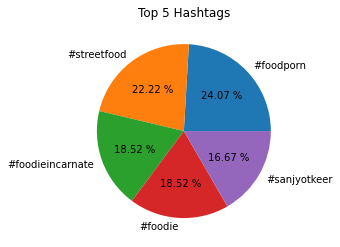

In [299]:
top_hash = []
freq = []
for h in hashtags[:5]:
    top_hash.append(h[1])
    freq.append(h[0])
    print(h[1], h[0])

plt.pie(freq, labels=top_hash, autopct = '%.2f %%')
plt.title("Top 5 Hashtags")
plt.show()

### Q(3.1) Likes on top 10 posts of each handle

In [301]:
likes = []
for i in top_handles:
    search = driver.find_element_by_xpath('//div[starts-with(@class,"LWmhU")]/input')
    search.clear()
    search.send_keys(i)
    time.sleep(3)
    a = driver.find_elements_by_xpath('//div[contains(@class,"uL8Hv")]')
    for j in a:
        if j.text.strip() == i:
            j.click()
            break;
    time.sleep(2)
    post = driver.find_element_by_xpath('//div[starts-with(@class,"v1Nh3")]')
    post.click()
    l = []
    print("Likes of InstaHnadle" ,i)
    print()
    for i in range(10):
        # Likes on Post
        try:
            span=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]/a/span')))
            l.append(span.text)
            print("Post"+ str(i+1) + " " + span.text + " Likes")
        # Views On Video
        except:
            span=WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"HbPOm")]/span/span')))
            l.append(span.text)
            print("Post"+ str(i+1) + " " + span.text + " Views")
        next_post = driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]')
        next_post.click()
    likes.append(l)
    print()
    print("--------------------------------------------------------------------------------------------------")
    print()
    close = driver.find_element_by_xpath('//div[contains(@class,"yiMZG")]/button')
    close.click()

Likes of InstaHnadle food

Post1 368 Likes
Post2 1,213 Likes
Post3 1,232 Likes
Post4 982 Likes
Post5 1,017 Likes
Post6 1,507 Likes
Post7 736 Likes
Post8 979 Likes
Post9 964 Likes
Post10 625 Likes

--------------------------------------------------------------------------------------------------

Likes of InstaHnadle foodtalkindia

Post1 665 Likes
Post2 6,590 Likes
Post3 187 Likes
Post4 623 Likes
Post5 446 Likes
Post6 938 Likes
Post7 685 Likes
Post8 1,050 Likes
Post9 1,040 Likes
Post10 609 Likes

--------------------------------------------------------------------------------------------------

Likes of InstaHnadle foodie_incarnate

Post1 47,469 Views
Post2 15,549 Likes
Post3 22,035 Likes
Post4 152,545 Views
Post5 22,325 Likes
Post6 27,166 Likes
Post7 126,331 Views
Post8 11,221 Likes
Post9 42,895 Likes
Post10 525,231 Views

--------------------------------------------------------------------------------------------------

Likes of InstaHnadle dilsefoodie

Post1 3,981 Likes
Post2 112,306

### Q(3.2) Avearge Likes of Each Handle

In [302]:
avg_likes = []

for i in range(5):
    like = likes[i]
    sum=0
    for l in like:
        n = int(l.replace(',',''))
        sum+=n
    avg = sum/10
    avg_likes.append(avg)
    print("Average Likes on posts of instahandle " + top_handles[i] + " is " + str(avg))

Average Likes on posts of instahandle food is 962.3
Average Likes on posts of instahandle foodtalkindia is 1283.3
Average Likes on posts of instahandle foodie_incarnate is 99276.7
Average Likes on posts of instahandle dilsefoodie is 58869.1
Average Likes on posts of instahandle yourfoodlab is 112096.4


### Q(3.3) Ratio of Average Likes to the Followers

In [303]:
ratio = []
for i in range(5):
    r = avg_likes[i]/top_handles_followers[i]
    ratio.append(r)
    print("Ratio for instahandle " + top_handles[i] + " : " + str(r))

Ratio for instahandle food : 0.007571680357536272
Ratio for instahandle foodtalkindia : 0.004206603117993366
Ratio for instahandle foodie_incarnate : 0.20660865837263218
Ratio for instahandle dilsefoodie : 0.07474397227053999
Ratio for instahandle yourfoodlab : 0.06504948794369701


### Q(3.4) Bar Graph to show the above calculated Data

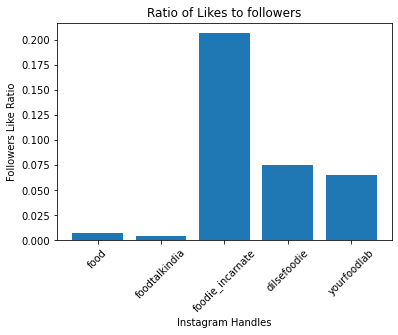

In [304]:
plt.bar(top_handles, ratio)
plt.xticks(rotation = 45)
plt.title("Ratio of Likes to followers")
plt.xlabel("Instagram Handles")
plt.ylabel("Followers Like Ratio")
plt.show()